In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [2]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500190,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706891,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819364,394024400
...,...,...,...,...,...,...
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300


In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2.805000e+03
mean,59.711983,60.388770,59.056136,59.749358,57.797628,2.018140e+08
std,48.597229,49.241364,47.982251,48.641368,49.178756,1.713132e+08
min,13.856071,14.271429,13.753571,13.947500,12.046193,3.519590e+07
25%,24.241072,24.459999,24.017500,24.240000,22.036524,9.415480e+07
50%,38.400002,38.560001,38.000000,38.327499,36.252605,1.377592e+08
75%,80.062500,80.849998,79.327499,79.902496,78.447800,2.447060e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.506120e+09


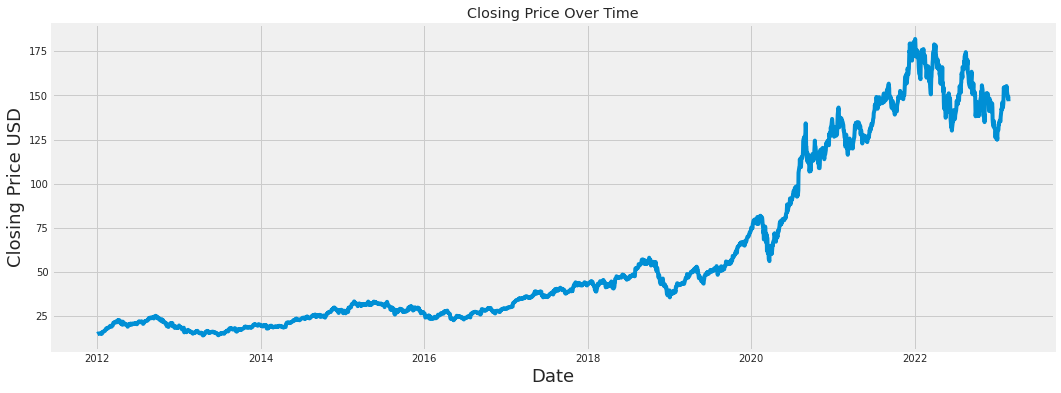

In [4]:
plt.figure(figsize=(16,6))
plt.title('Closing Price Over Time')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])

In [18]:
dataset = data.values
dataset

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [148.91000366],
       [149.3999939 ],
       [146.71000671]])

               0  Rolling_Average  Rolling SD
0      14.686786              NaN         NaN
1      14.765714              NaN         NaN
2      14.929643              NaN         NaN
3      15.085714              NaN         NaN
4      15.061786              NaN         NaN
...          ...              ...         ...
2800  152.550003       152.931429    1.600112
2801  148.479996       152.590001    2.240234
2802  148.910004       152.290002    2.598969
2803  149.399994       151.654286    2.696215
2804  146.710007       150.727145    3.153225

[2805 rows x 3 columns]


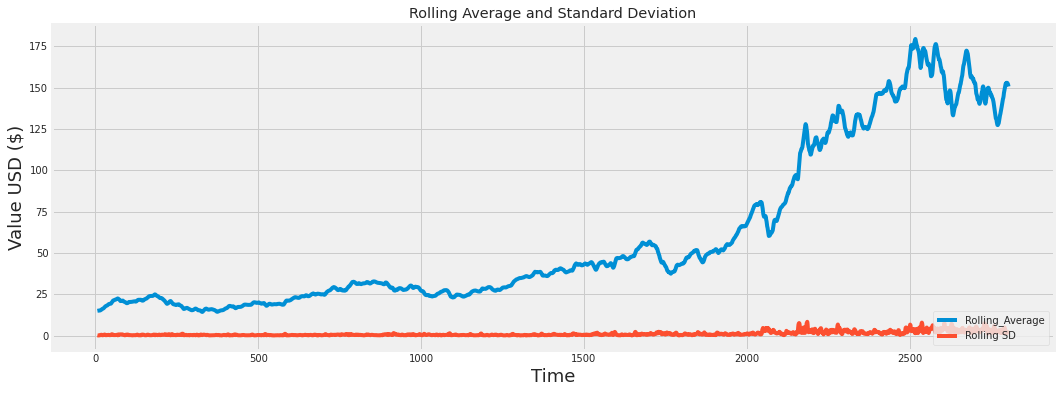

In [30]:
df1 = pd.DataFrame(dataset)
df1['Rolling_Average'] = df1.rolling(7).mean()
df1['Rolling SD'] = df1.iloc[:, 0].rolling(7).std()
print(df1)

plt.figure(figsize=(16,6))
plt.title('Rolling Average and Standard Deviation')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value USD ($)', fontsize=18)
plt.plot(df1['Rolling_Average'])
plt.plot(df1[['Rolling SD']])
plt.legend(['Rolling_Average', 'Rolling SD'], loc='lower right')
plt.show()



In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset)

(-0.047934150172252145,
 0.9543838375625684,
 22,
 2782,
 {'1%': -3.432702747682219,
  '5%': -2.862579477749862,
  '10%': -2.56732334640735},
 10265.52140437092)

In [8]:
training_data_len = int(np.ceil( len(dataset) * .75 ))

In [9]:
training_data_len

2104

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80304951],
       [0.80596503],
       [0.78995916]])

In [11]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2044/2044 [==============================] - 83s 39ms/step - loss: 2.6186e-04
Epoch 2/5
2044/2044 [==============================] - 79s 39ms/step - loss: 1.2543e-04
Epoch 3/5
2044/2044 [==============================] - 82s 40ms/step - loss: 9.5280e-05
Epoch 4/5
2044/2044 [==============================] - 80s 39ms/step - loss: 7.7058e-05
Epoch 5/5
2044/2044 [==============================] - 81s 40ms/step - loss: 7.2238e-05


In [13]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

22/22 [==============================] - 2s 40ms/step


5.100942309287826

<ipython-input-14-79626df48c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


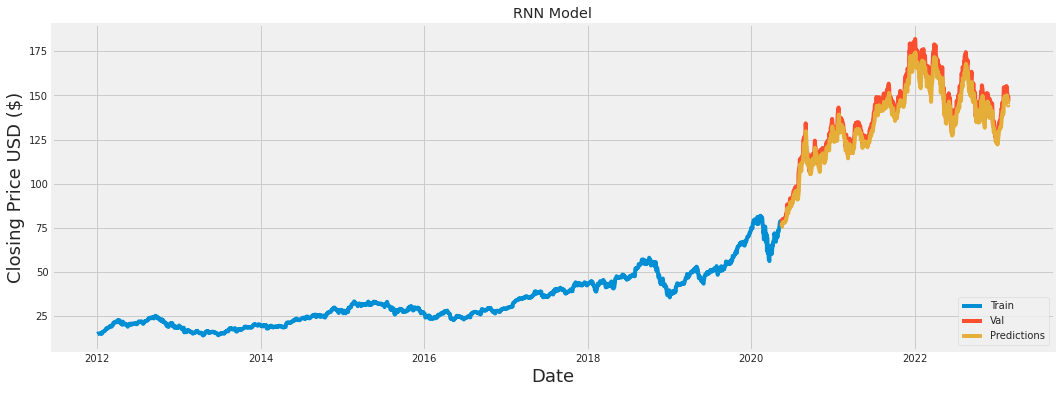

In [14]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(16,6))
plt.title('RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [15]:
valid

,Close,Predictions
Date,,
2020-05-14,77.385002,75.675705
2020-05-15,76.927498,75.873383
2020-05-18,78.739998,75.507790
2020-05-19,78.285004,76.907516
2020-05-20,79.807503,76.798904
...,...,...
2023-02-17,152.550003,148.932480
2023-02-21,148.479996,147.889999
2023-02-22,148.910004,144.316437
